## Pandas matplotlib

#### scatter graph - 데이터의 상관관계를 볼 때 사용가능

In [2]:
df_data = pd.read_csv("../code/ch2/housing.data", sep='\s+', header=None)
df_data.columns = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO' ,'B', 'LSTAT', 'MEDV']
df_data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


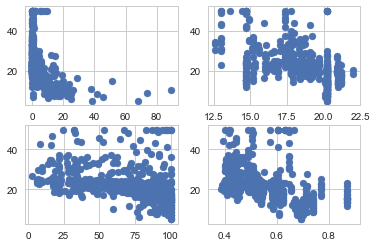

In [4]:
fig = plt.figure()
ax = []
for i in range(1,5):
    ax.append(fig.add_subplot(2,2,i))
ax[0].scatter(df_data['CRIM'], df_data['MEDV'])
ax[1].scatter(df_data['PTRATIO'], df_data['MEDV'])
ax[2].scatter(df_data['AGE'], df_data['MEDV'])
ax[3].scatter(df_data['NOX'], df_data['MEDV'])
plt.show()

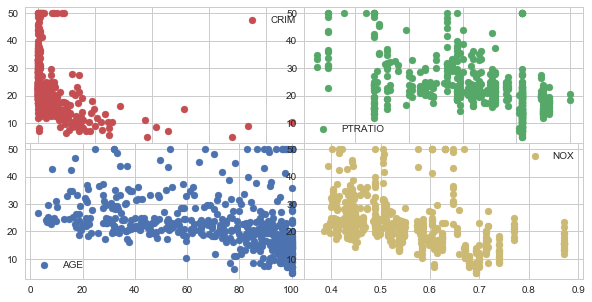

In [16]:
fig = plt.figure(figsize=(10,5))
ax = []
for i in range(1,5):
    ax.append(fig.add_subplot(2,2,i))
ax[0].scatter(df_data['CRIM'], df_data['MEDV'], c='r', label='CRIM')
ax[1].scatter(df_data['PTRATIO'], df_data['MEDV'], c='g' ,label='PTRATIO')
ax[2].scatter(df_data['AGE'], df_data['MEDV'], c='b' ,label='AGE')
ax[3].scatter(df_data['NOX'], df_data['MEDV'], c='y' ,label='NOX')

plt.subplots_adjust(wspace=0, hspace=0)
for i in range(4):
    ax[i].legend()
    
plt.show()

##### pandas 자체 matplotlib

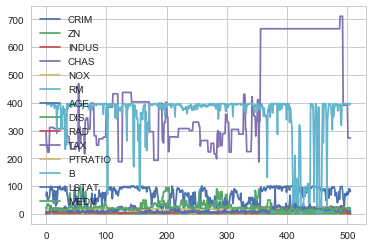

In [17]:
df_data.plot()
plt.show()

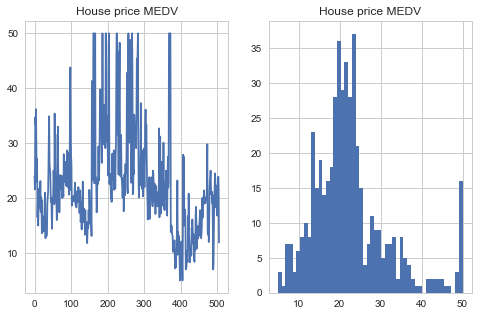

In [20]:
fig = plt.figure(figsize=(8,5))
ax_1 = fig.add_subplot(1,2,1)
ax_2 = fig.add_subplot(1,2,2)
ax_1.plot(df_data["MEDV"])
ax_2.hist(df_data["MEDV"], bins=50)
ax_1.set_title("House price MEDV")
ax_2.set_title("House price MEDV")

plt.show()

#### scaled data

In [22]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scale_data = std_scaler.fit_transform(df_data)
scale_data

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ..., 
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

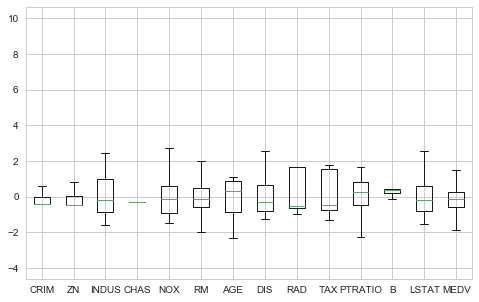

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.boxplot(scale_data, labels=df_data.columns)
fig.set_size_inches(8, 5)
plt.show()

##### scaled matrix

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


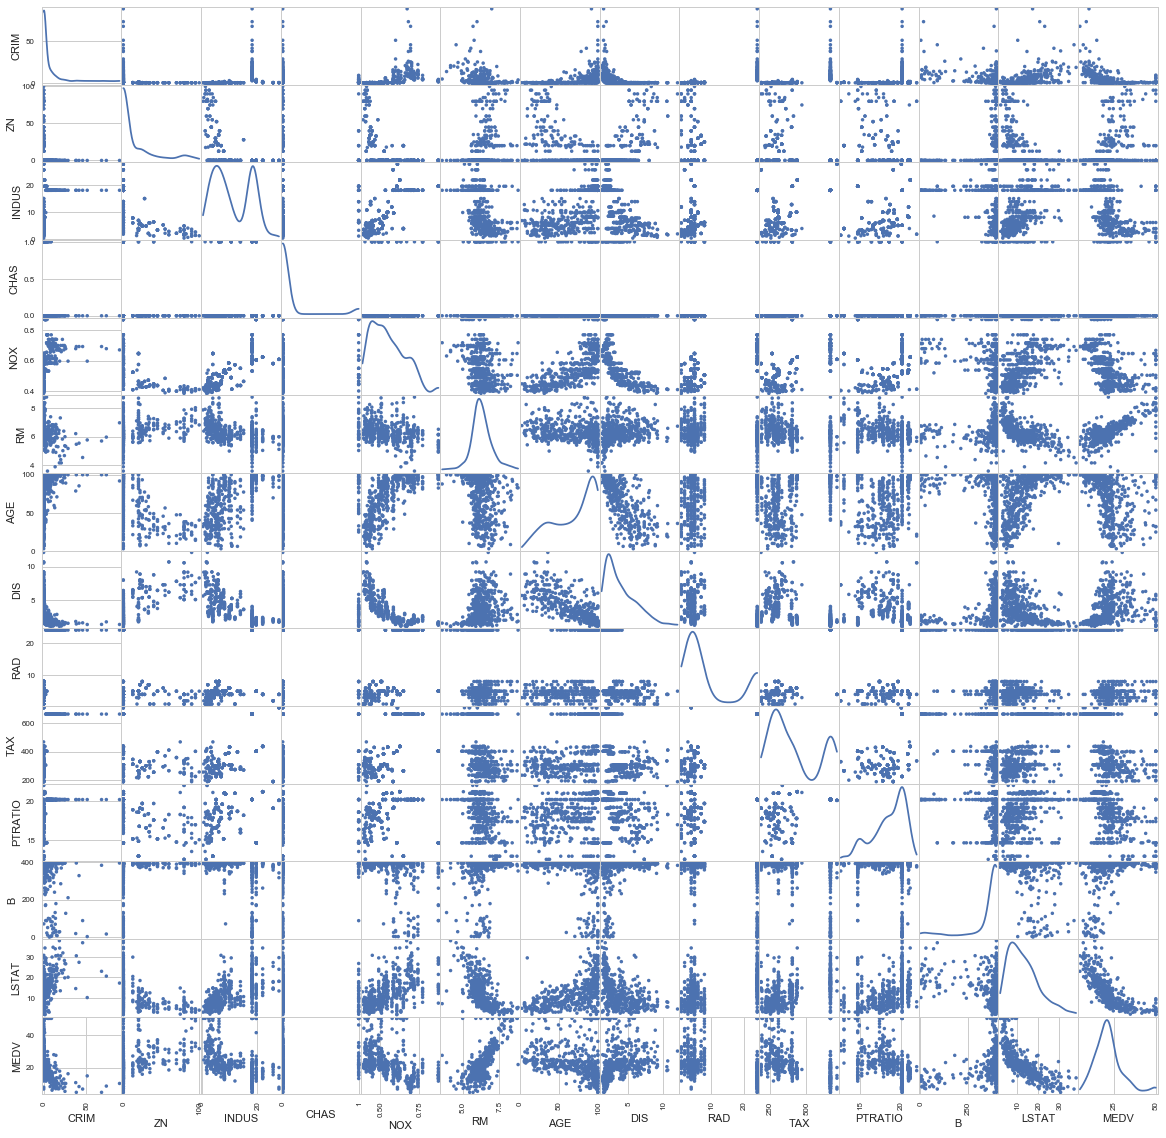

In [26]:
pd.scatter_matrix(df_data, diagonal="kde", alpha=1,  figsize=(20, 20))
plt.show()

In [27]:
corr_data = np.corrcoef(scale_data.T[:5])
corr_data

array([[ 1.        , -0.20046922,  0.40658341, -0.05589158,  0.42097171],
       [-0.20046922,  1.        , -0.53382819, -0.04269672, -0.51660371],
       [ 0.40658341, -0.53382819,  1.        ,  0.06293803,  0.76365145],
       [-0.05589158, -0.04269672,  0.06293803,  1.        ,  0.09120281],
       [ 0.42097171, -0.51660371,  0.76365145,  0.09120281,  1.        ]])

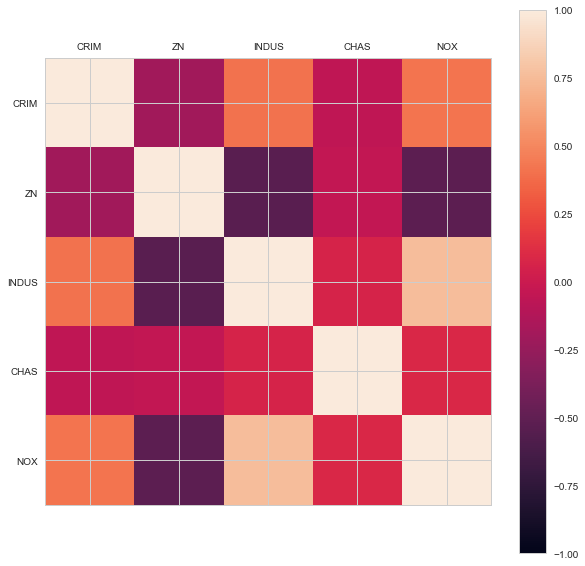

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_data, vmin=-1, vmax=1,  interpolation='nearest')
fig.colorbar(cax)
fig.set_size_inches(10,10)
ticks= np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(df_data.columns[:5])
ax.set_yticklabels(df_data.columns[:5])

plt.show()